In [0]:
# !pip install tensorflow==2.0.0-beta0

In [0]:
import tensorflow as tf
import json
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tf.__version__

'2.0.0-beta0'

In [0]:
# Download the data
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json

--2020-01-15 23:16:32--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.24.128, 2404:6800:4003:c04::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.24.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  19.9MB/s    in 0.3s    

2020-01-15 23:16:33 (19.9 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [0]:
# HYPER PARAMETERS:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

# Sarcasm data has about 27k intances in it so we will train with 20k and test 7k
training_size = 20000 

In [0]:
with open("/tmp/sarcasm.json", 'r') as f:
    datastore = json.load(f)

sentences = []
labels = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

# train & test sentences
training_sentences = sentences[:training_size]
testing_sentences = sentences[training_size:]

# train & test labels
training_labels = labels[:training_size]
testing_labels = labels[training_size:]

In [0]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [0]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, 
                    validation_data=(testing_padded, testing_labels), verbose=2)

Train on 20000 samples, validate on 6709 samples
Epoch 1/30
20000/20000 - 2s - loss: 0.6708 - accuracy: 0.5804 - val_loss: 0.6036 - val_accuracy: 0.7861
Epoch 2/30
20000/20000 - 2s - loss: 0.4487 - accuracy: 0.8237 - val_loss: 0.3886 - val_accuracy: 0.8387
Epoch 3/30
20000/20000 - 2s - loss: 0.3172 - accuracy: 0.8738 - val_loss: 0.3524 - val_accuracy: 0.8502
Epoch 4/30
20000/20000 - 2s - loss: 0.2651 - accuracy: 0.8956 - val_loss: 0.3449 - val_accuracy: 0.8518
Epoch 5/30
20000/20000 - 2s - loss: 0.2288 - accuracy: 0.9106 - val_loss: 0.3897 - val_accuracy: 0.8284
Epoch 6/30
20000/20000 - 2s - loss: 0.2018 - accuracy: 0.9232 - val_loss: 0.3544 - val_accuracy: 0.8480
Epoch 7/30
20000/20000 - 2s - loss: 0.1799 - accuracy: 0.9319 - val_loss: 0.3581 - val_accuracy: 0.8548
Epoch 8/30
20000/20000 - 2s - loss: 0.1610 - accuracy: 0.9406 - val_loss: 0.3852 - val_accuracy: 0.8444
Epoch 9/30
20000/20000 - 2s - loss: 0.1464 - accuracy: 0.9477 - val_loss: 0.3862 - val_accuracy: 0.8504
Epoch 10/30
200

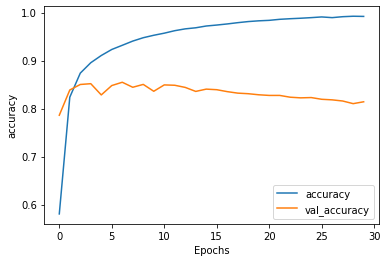

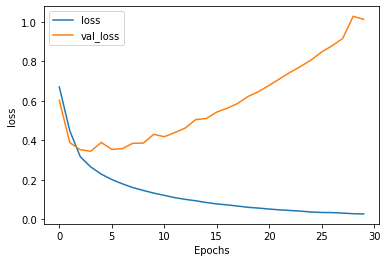

In [0]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

### NOTE:

- It is very important to monitor train and validation loss carefully during hyper params tuning in NLP problems because overfitting is very common

- Changing the corpus size AND max length can have an impact on validation 

In [0]:
# HYPER PARAMETERS:
"""
 a decrease in vocabulary size, and taking shorter sentences, reducing the likelihood of padding
"""
vocab_size = 1000 # 10k previously
embedding_dim = 16 # NOTE: The change in this has very little impact on flattening the overall loss
max_length = 16 # 100 previously
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, 
                    validation_data=(testing_padded, testing_labels), verbose=2)

Train on 20000 samples, validate on 6709 samples
Epoch 1/30
20000/20000 - 1s - loss: 0.5252 - accuracy: 0.7380 - val_loss: 0.4129 - val_accuracy: 0.8116
Epoch 2/30
20000/20000 - 1s - loss: 0.3801 - accuracy: 0.8280 - val_loss: 0.3990 - val_accuracy: 0.8107
Epoch 3/30
20000/20000 - 1s - loss: 0.3631 - accuracy: 0.8353 - val_loss: 0.3994 - val_accuracy: 0.8173
Epoch 4/30
20000/20000 - 1s - loss: 0.3585 - accuracy: 0.8378 - val_loss: 0.4016 - val_accuracy: 0.8137
Epoch 5/30
20000/20000 - 1s - loss: 0.3558 - accuracy: 0.8398 - val_loss: 0.4030 - val_accuracy: 0.8141
Epoch 6/30
20000/20000 - 1s - loss: 0.3534 - accuracy: 0.8386 - val_loss: 0.4132 - val_accuracy: 0.8061
Epoch 7/30
20000/20000 - 1s - loss: 0.3524 - accuracy: 0.8397 - val_loss: 0.4089 - val_accuracy: 0.8141
Epoch 8/30
20000/20000 - 1s - loss: 0.3518 - accuracy: 0.8393 - val_loss: 0.4058 - val_accuracy: 0.8122
Epoch 9/30
20000/20000 - 1s - loss: 0.3505 - accuracy: 0.8404 - val_loss: 0.4061 - val_accuracy: 0.8117
Epoch 10/30
200

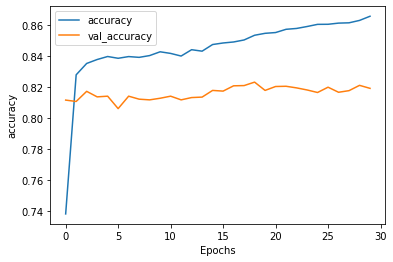

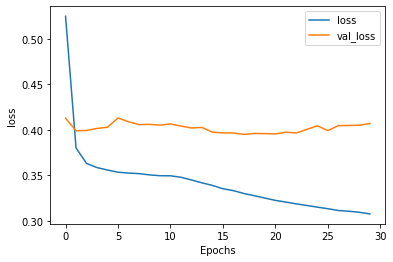

In [0]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

Now we can see that the loss has been flattened out but the cost associating with this is that the overall acc is not as high as b4

### THE IMPACT OF SUB-TOKENIZE ON TRAINING

Earlier this week, we looked at using TensorFlow Data Services, or TFDS to load the reviews from the IMDb dataset and perform classification on them. In that video, you loaded the raw text for the reviews, and tokenized them yourself. However, often with prepackaged datasets like these, some data scientists have done the work for you already, and the IMDb dataset is no exception. In this video, we'll take a look at a version of the IMDb dataset that has been pre-tokenized for you, but the tokenization is done on sub words. We'll use that to demonstrate **how text classification can have some unique issues, namely that the sequence of words can be just as important as their existence.**

REF:
- https://www.tensorflow.org/datasets/api_docs/python/tfds/features/text/SubwordTextEncoder

- https://www.tensorflow.org/datasets/catalog/imdb_reviews

In [0]:
!pip install -q tensorflow-datasets

In [0]:
import tensorflow_datasets as tfds
# NOTE THAT HERE WE ARE USING THE 8K version here
imdb, info = tfds.load("imdb_reviews/subwords8k", with_info=True, as_supervised=True)

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/0.1.0. Subsequent calls will reuse this data.


In [0]:
"""
We have a pre-trained sub-words tokenizer now, so we can inspect its vocabulary by looking at its sub-words property.
"""

train_data, test_data = imdb['train'], imdb['test']

tokenizer = info.features['text'].encoder
print(tokenizer.subwords)

['the_', ', ', '. ', 'a_', 'and_', 'of_', 'to_', 's_', 'is_', 'br', 'in_', 'I_', 'that_', 'this_', 'it_', ' /><', ' />', 'was_', 'The_', 'as_', 't_', 'with_', 'for_', '.<', 'on_', 'but_', 'movie_', ' (', 'are_', 'his_', 'have_', 'film_', 'not_', 'ing_', 'be_', 'ed_', 'you_', ' "', 'it', 'd_', 'an_', 'he_', 'by_', 'at_', 'one_', 'who_', 'y_', 'from_', 'e_', 'or_', 'all_', 'like_', 'they_', '" ', 'so_', 'just_', 'has_', ') ', 'her_', 'about_', 'out_', 'This_', 'some_', 'ly_', 'movie', 'film', 'very_', 'more_', 'It_', 'would_', 'what_', 'when_', 'which_', 'good_', 'if_', 'up_', 'only_', 'even_', 'their_', 'had_', 'really_', 'my_', 'can_', 'no_', 'were_', 'see_', 'she_', '? ', 'than_', '! ', 'there_', 'get_', 'been_', 'into_', ' - ', 'will_', 'much_', 'story_', 'because_', 'ing', 'time_', 'n_', 'we_', 'ed', 'me_', ': ', 'most_', 'other_', 'don', 'do_', 'm_', 'es_', 'how_', 'also_', 'make_', 'its_', 'could_', 'first_', 'any_', "' ", 'people_', 'great_', 've_', 'ly', 'er_', 'made_', 'r_', 'B

In [0]:
sample_string = 'TensorFlow, from basics to mastery'

tokenized_string = tokenizer.encode(sample_string)
print ('Tokenized string is {}'.format(tokenized_string))

original_string = tokenizer.decode(tokenized_string)
print ('The original string: {}'.format(original_string))

Tokenized string is [6307, 2327, 4043, 2120, 2, 48, 4249, 4429, 7, 2652, 8050]
The original string: TensorFlow, from basics to mastery


In [0]:
# showing value to token: note that we have each token just represent subword
# NOTE: this is case sensitive AND punctuation is maintained
for ts in tokenized_string:
  print ('{} ----> {}'.format(ts, tokenizer.decode([ts])))

6307 ----> Ten
2327 ----> sor
4043 ----> Fl
2120 ----> ow
2 ----> , 
48 ----> from 
4249 ----> basi
4429 ----> cs 
7 ----> to 
2652 ----> master
8050 ----> y


In [0]:
embedding_dim = 64
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
    # One thing to take into account though, is the shape of the vectors coming 
    # from the tokenizer through the embedding, and it's not easily flattened. 
    # So we'll use Global Average Pooling 1D instead
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
global_average_pooling1d (Gl (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 6)                 390       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 524,237
Trainable params: 524,237
Non-trainable params: 0
_________________________________________________________________


In [0]:
# NOTE: training using subwords are dealing with a lot hyper params and subwords
# HENCE, we expected to be a lot slower
# Also here data has been preprocessed, we do not have to do much work here
num_epochs = 10

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

history = model.fit(train_data, epochs=num_epochs, validation_data=test_data)

Epoch 1/10
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


25000/25000 [==============================] - 356s 14ms/step - loss: 0.6861 - accuracy: 0.5251 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/10
25000/25000 [==============================] - 182s 7ms/step - loss: 0.6836 - accuracy: 0.5318 - val_loss: 0.6843 - val_accuracy: 0.5333
Epoch 3/10
25000/25000 [==============================] - 183s 7ms/step - loss: 0.6827 - accuracy: 0.5378 - val_loss: 0.6843 - val_accuracy: 0.5367
Epoch 4/10
25000/25000 [==============================] - 179s 7ms/step - loss: 0.6820 - accuracy: 0.5393 - val_loss: 0.6845 - val_accuracy: 0.5369
Epoch 5/10
25000/25000 [==============================] - 180s 7ms/step - loss: 0.6815 - accuracy: 0.5417 - val_loss: 0.6847 - val_accuracy: 0.5380
Epoch 6/10
25000/25000 [==============================] - 179s 7ms/step - loss: 0.6811 - accuracy: 0.5430 - val_loss: 0.6849 - val_accuracy: 0.5380
Epoch 7/10
25000/25000 [==============================] - 180s 7ms/step - loss: 0.6809 - accuracy: 0.5433 - val_lo

### NOTE:

- the accuracy was barely about 50 percent, which you could get with a random guess. While losses decreasing, it's decreasing in a very small way. WHY????
- The keys in the fact that we're using sub-words and NOT for-words, sub-word meanings are often nonsensical! It's only when we put them together in sequences that they have meaningful semantics. Thus, some way from learning from sequences would be a great way forward, and that's exactly what RNN can take over

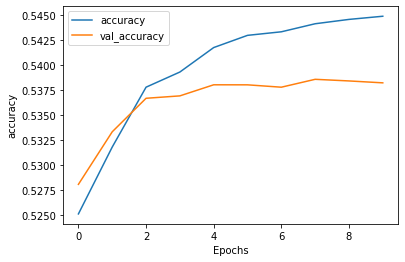

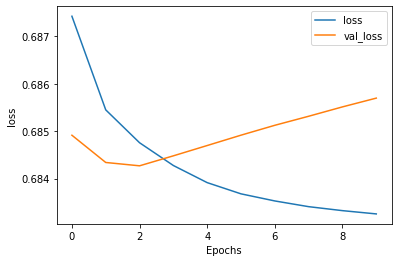

In [0]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")